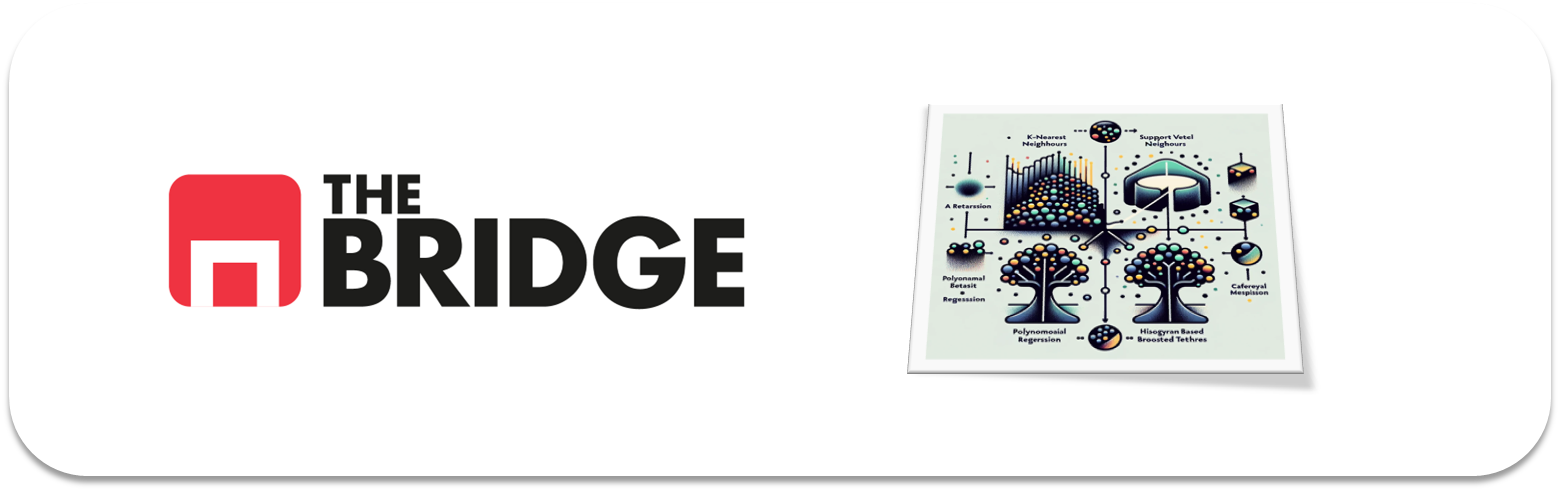

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [29]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



In [43]:
df = pd.read_csv("./data/credit_npo.csv")

df.dropna(inplace = True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [4]:
#df  = df.sample(frac=0.05, random_state=42)
#df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 50342 to 4524
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            601 non-null    int64  
 1   SeriousDlqin2yrs                      601 non-null    int64  
 2   RevolvingUtilizationOfUnsecuredLines  601 non-null    float64
 3   age                                   601 non-null    int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  601 non-null    int64  
 5   DebtRatio                             601 non-null    float64
 6   MonthlyIncome                         601 non-null    float64
 7   NumberOfOpenCreditLinesAndLoans       601 non-null    int64  
 8   NumberOfTimes90DaysLate               601 non-null    int64  
 9   NumberRealEstateLoansOrLines          601 non-null    int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  601 non-null    int64  
 11  NumberOfDependents 

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

| Variable Name                          | Description                                                                                             | Type       |
|----------------------------------------|---------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                      | Person experienced 90 days past due delinquency or worse                                                | Y/N        |
| RevolvingUtilizationOfUnsecuredLines   | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                    | Age of borrower in years                                                                               | integer    |
| NumberOfTime30-59DaysPastDueNotWorse   | Number of times borrower has been 30-59 days past due but no worse in the last 2 years                  | integer    |
| DebtRatio                              | Monthly debt payments, alimony, living costs divided by monthly gross income                            | percentage |
| MonthlyIncome                          | Monthly income                                                                                         | real       |
| NumberOfOpenCreditLinesAndLoans        | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)     | integer    |
| NumberOfTimes90DaysLate                | Number of times borrower has been 90 days or more past due                                              | integer    |
| NumberRealEstateLoansOrLines           | Number of mortgage and real estate loans including home equity lines of credit                          | integer    |
| NumberOfTime60-89DaysPastDueNotWorse   | Number of times borrower has been 60-89 days past due but no worse in the last 2 years                  | integer    |
| NumberOfDependents                     | Number of dependents in family excluding themselves (spouse, children, etc.)                            | integer    |


| Nombre de Variable                          | Descripción                                                                                             | Tipo       |
|---------------------------------------------|---------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                           | Persona experimentó morosidad de 90 días o más en el pasado                                               | S/N        |
| RevolvingUtilizationOfUnsecuredLines        | Saldo total en tarjetas de crédito y líneas de crédito personales, excepto bienes raíces y sin deudas a plazos como préstamos de automóviles, dividido por la suma de los límites de crédito | porcentaje |
| edad                                      | Edad del prestatario en años                                                                            | entero     |
| NumberOfTime30-59DaysPastDueNotWorse        | Número de veces que el prestatario ha estado entre 30 y 59 días moroso, pero no peor en los últimos 2 años | entero     |
| DebtRatio                                 | Pagos mensuales de deuda, pensión alimenticia, costos de vida divididos por ingreso bruto mensual        | porcentaje |
| IngresoMensual                            | Ingreso mensual                                                                                        | real       |
| NumberOfOpenCreditLinesAndLoans           | Número de préstamos abiertos (a plazos como préstamo de automóvil o hipoteca) y líneas de crédito (por ejemplo, tarjetas de crédito) | entero     |
| NumberOfTimes90DaysLate                   | Número de veces que el prestatario ha estado 90 días o más moroso                                       | entero     |
| NumeroPrestamosInmobiliariosOLíneas        | Número de préstamos hipotecarios y líneas de crédito inmobiliario, incluyendo líneas de crédito con garantía hipotecaria | entero     |
| NumberOfTime60-89DaysPastDueNotWorse        | Número de veces que el prestatario ha estado entre 60 y 89 días moroso, pero no peor en los últimos 2 años | entero     |
| NumberOfDependents                        | Número de dependientes en la familia, excluyéndose a sí mismos (cónyuge, hijos, etc.)                    | entero     |


In [34]:
categoricas = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando con un problema de clasificación binaria. El objetivo es predecir si una persona va a encontrarse en dificultades financieras en los dos próximos años o no. En este caso, la variable target (variable objetivo) sería "SeriousDlqin2yrs", que indica si una persona ha experimentado morosidad de 90 días o más en los dos próximos años (Y/N).

### #1.3
Pinta la distribución de frecuencias del target y coméntala

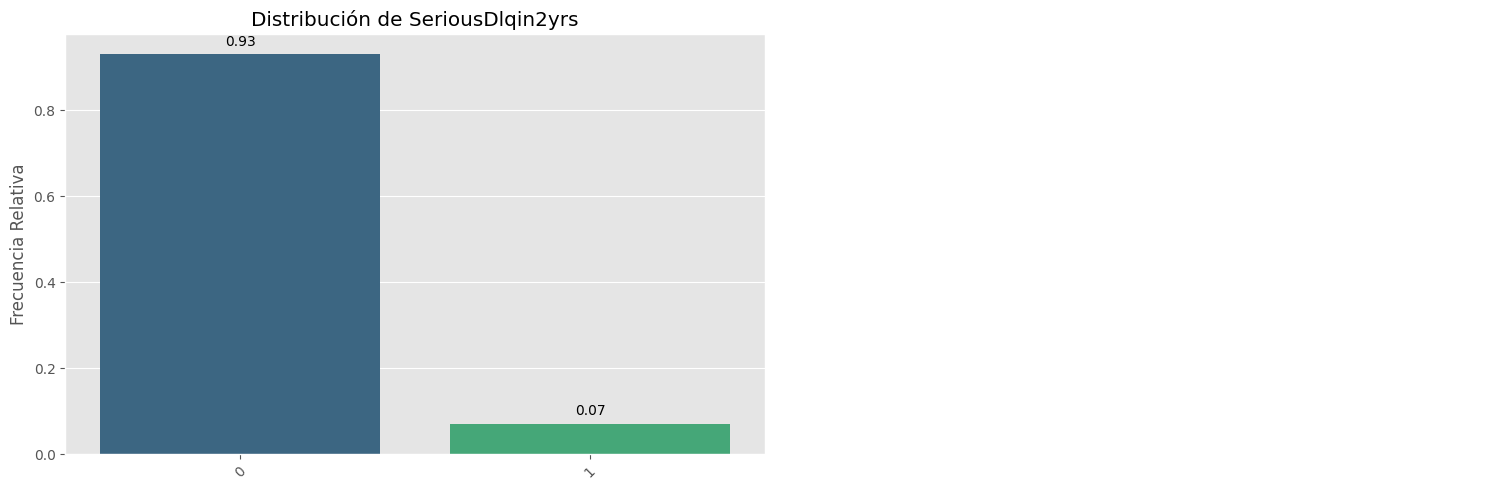

In [45]:
bt.pinta_distribucion_categoricas(df, ['SeriousDlqin2yrs'], relativa=True, mostrar_valores=True)

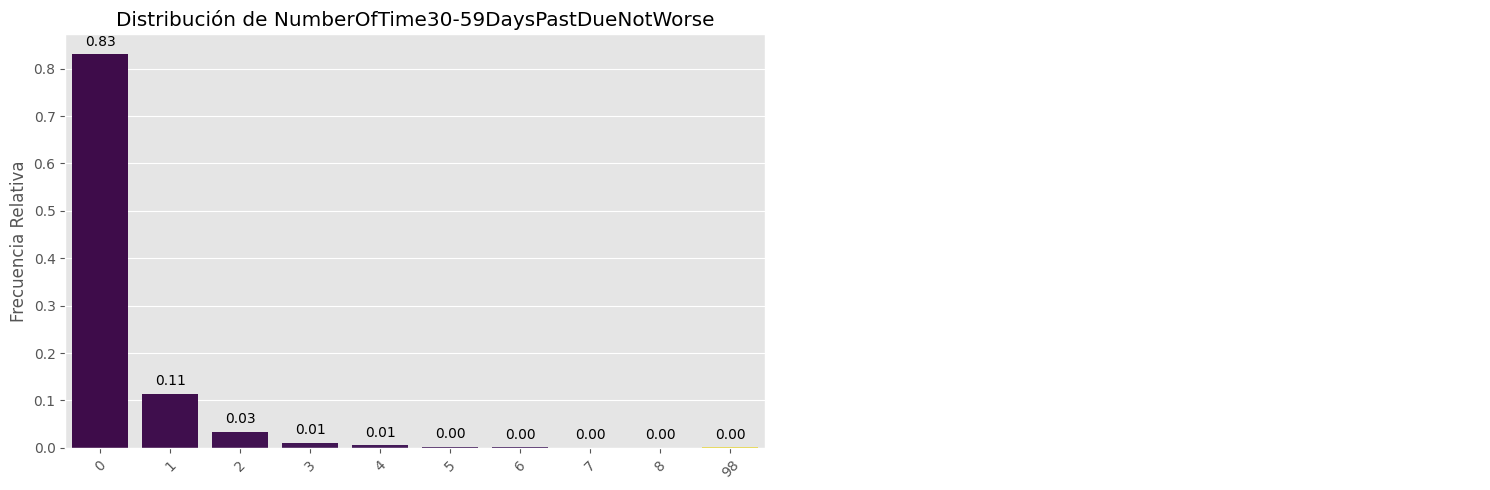

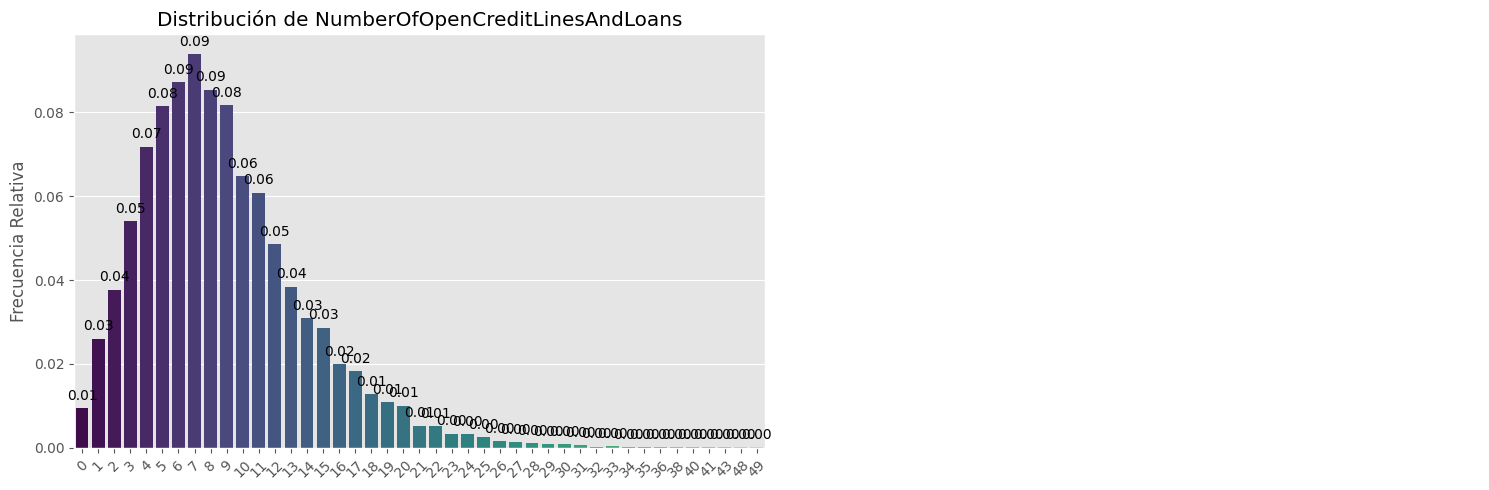

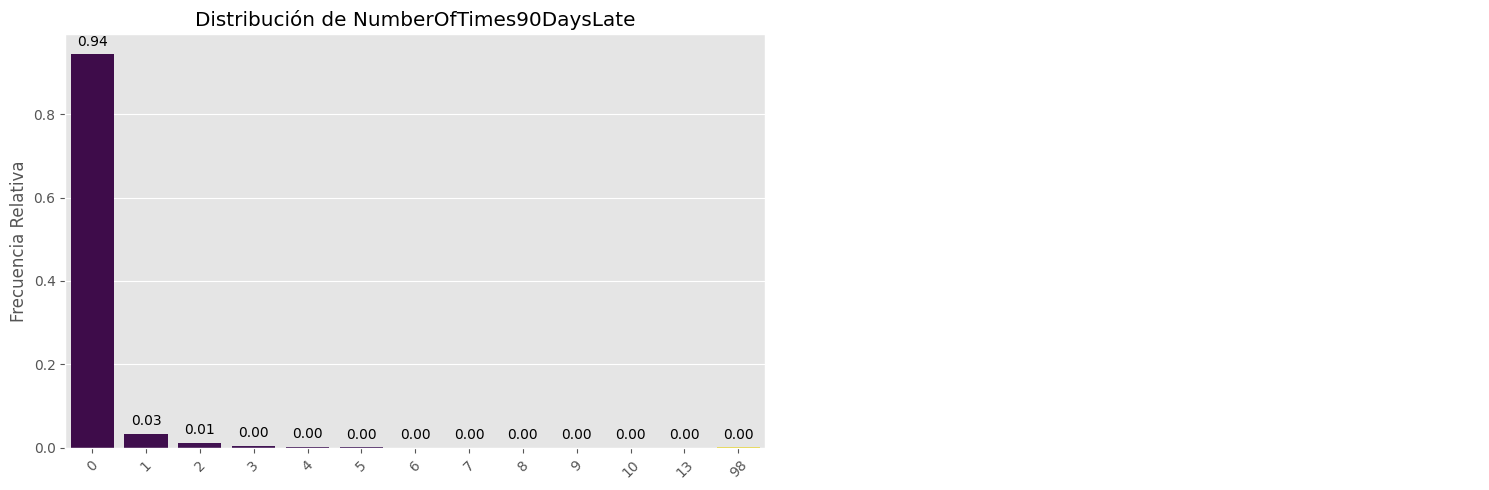

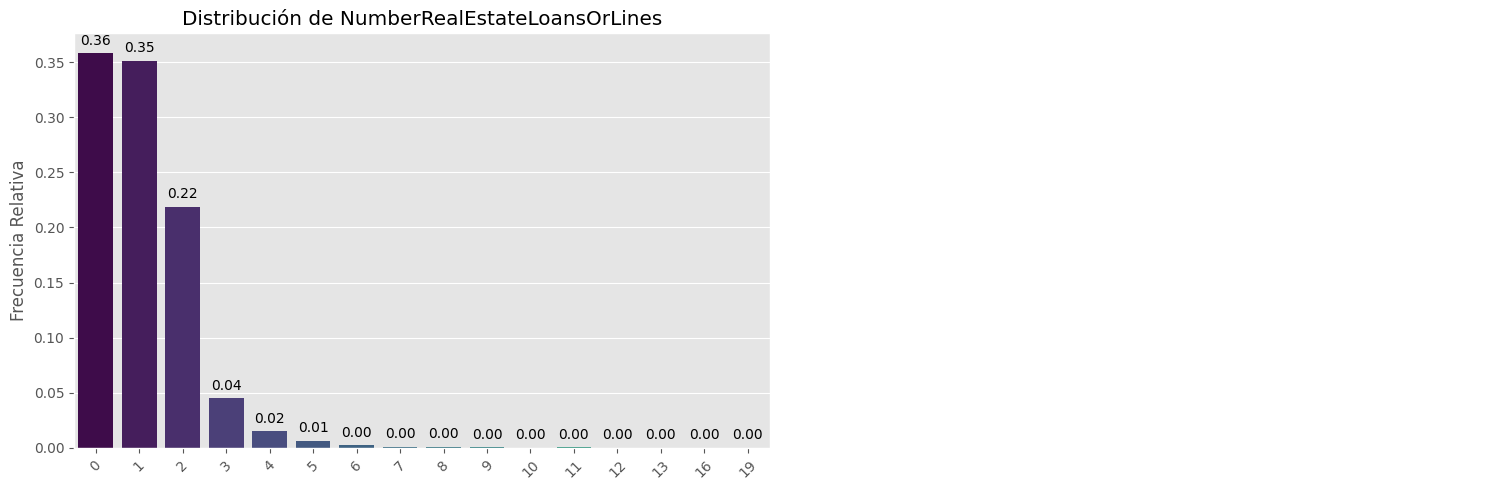

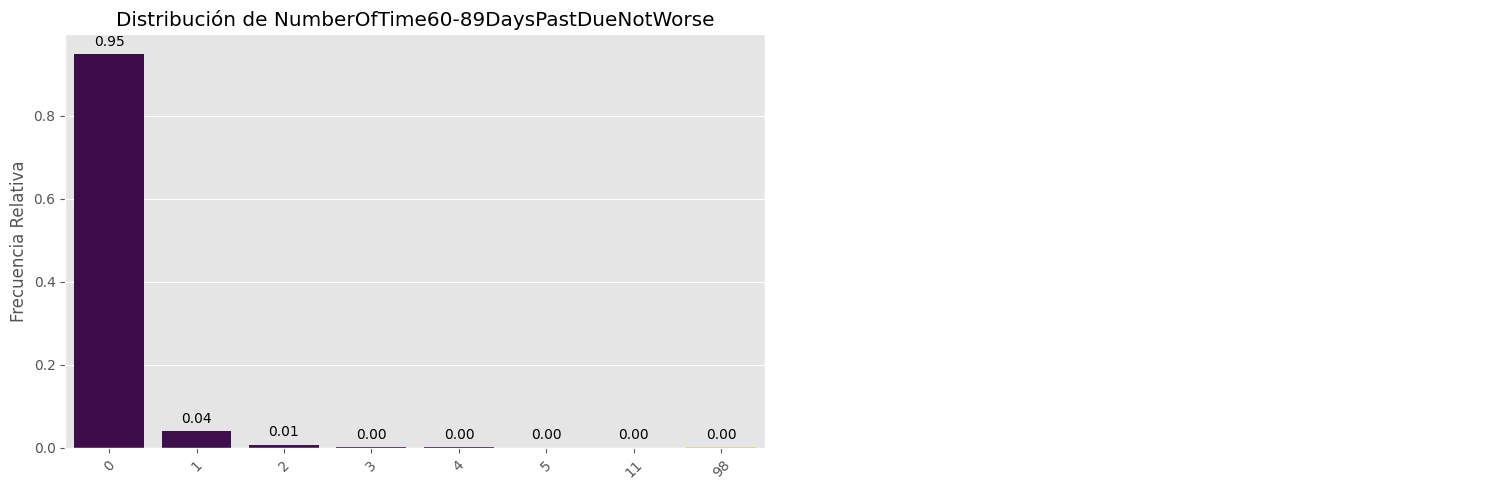

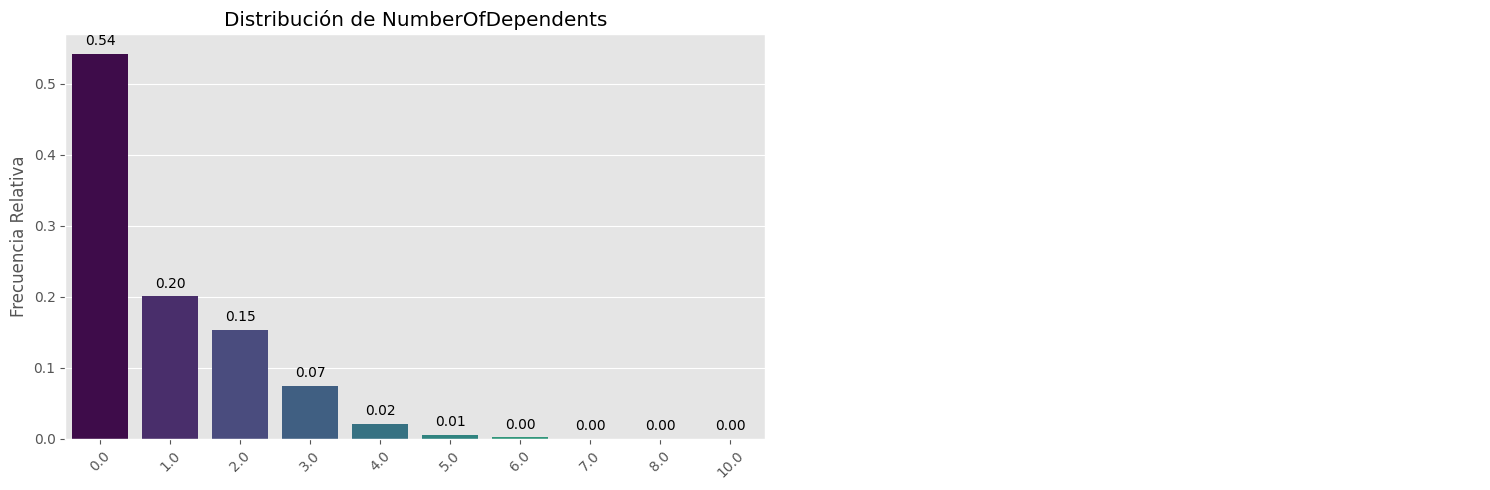

In [46]:
categoricas = ["NumberOfTime30-59DaysPastDueNotWorse","NumberRealEstateLoansOrLines","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]
for i in categoricas:
    bt.pinta_distribucion_categoricas(df, [i], relativa=True, mostrar_valores=True)



In [47]:
# Definir las columnas a modificar
columnas_a_modificar = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

# Convertir los valores a tipo numérico
df[columnas_a_modificar] = df[columnas_a_modificar].apply(pd.to_numeric, errors='coerce')

# Definir la lógica de mapeo para cada columna
mapping_logic = {
    'NumberOfTime30-59DaysPastDueNotWorse': {0: '0', 1: '1', 2: '2 o mas'},
    'NumberOfTimes90DaysLate': {0: '0', 1: '1', 2: '2 o mas'},
    'NumberRealEstateLoansOrLines': {0: '0', 1: '1', 2: '2 o mas'},
    'NumberOfTime60-89DaysPastDueNotWorse': {0: '0', 1: '1', 2: '2 o mas'},
    'NumberOfDependents': {0: '0', 1: '1', 2: '2 o mas'}
}

# Aplicar el mapeo a las columnas en el DataFrame
for col in columnas_a_modificar:
    df[col] = df[col].replace(mapping_logic[col])

# Otra opción para aplicar el mapeo:
# df[columnas_a_modificar] = df[columnas_a_modificar].replace(mapping_logic)



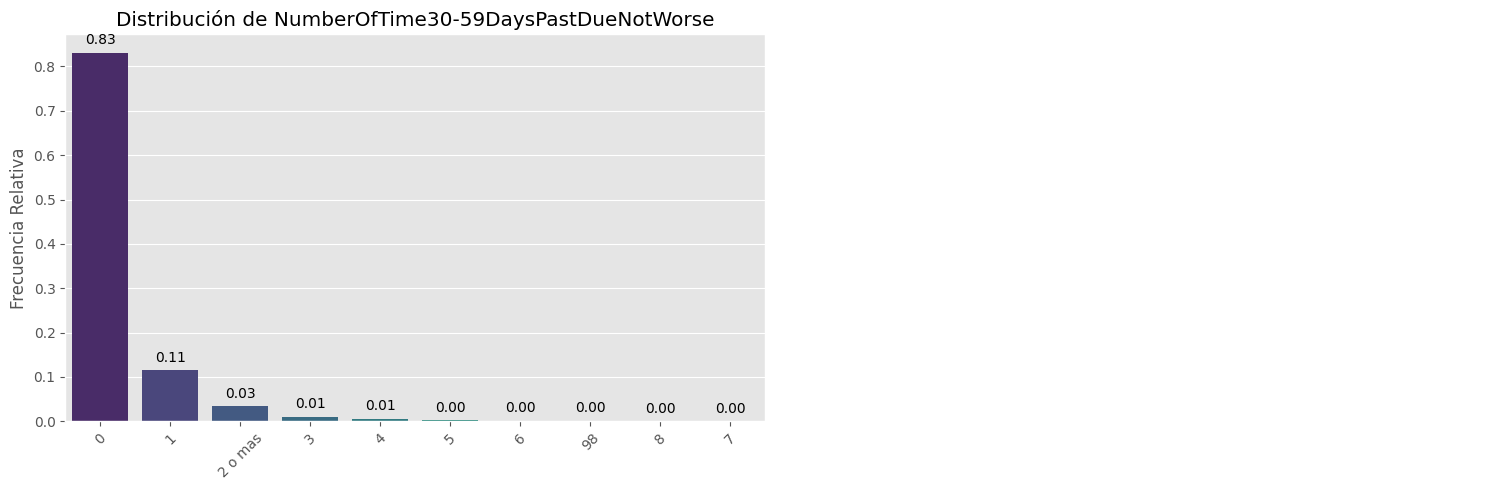

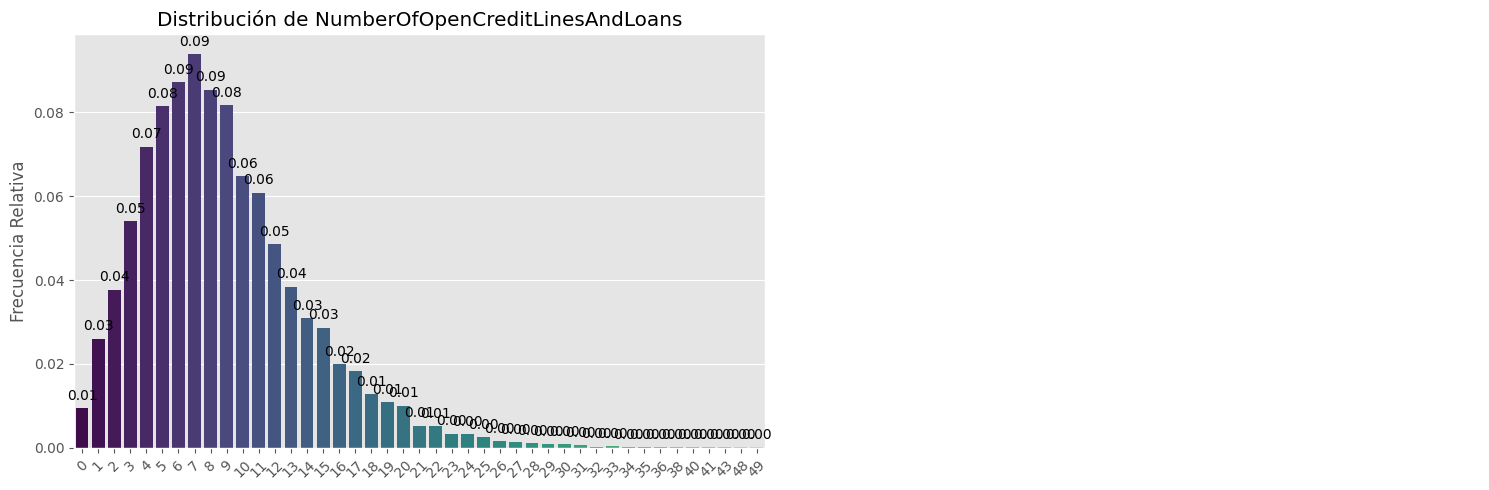

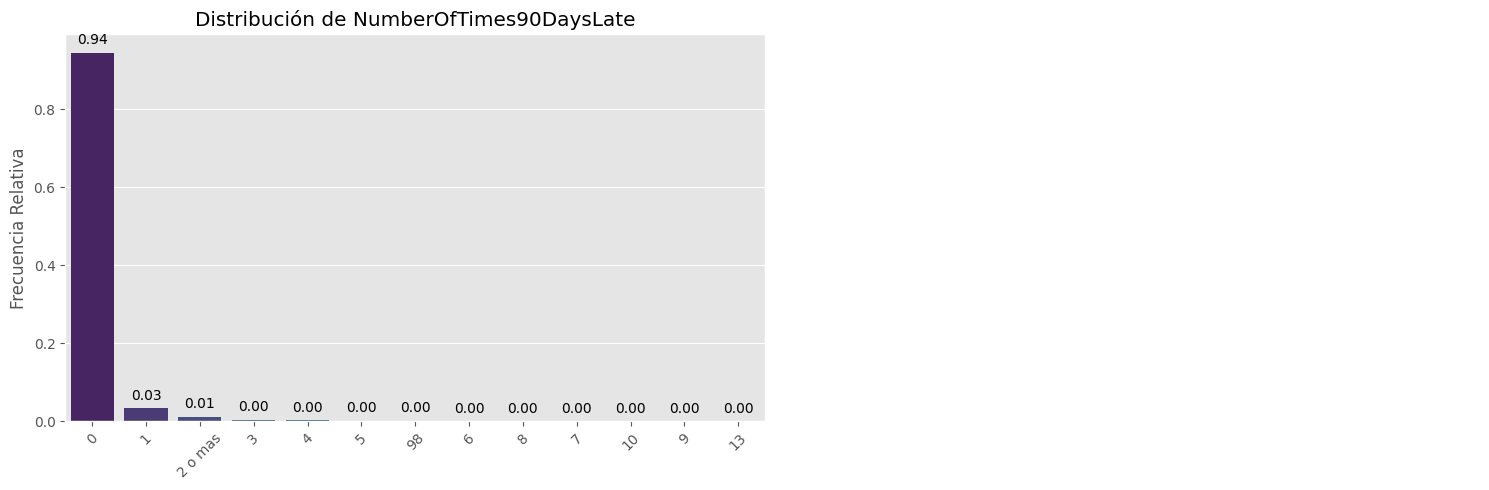

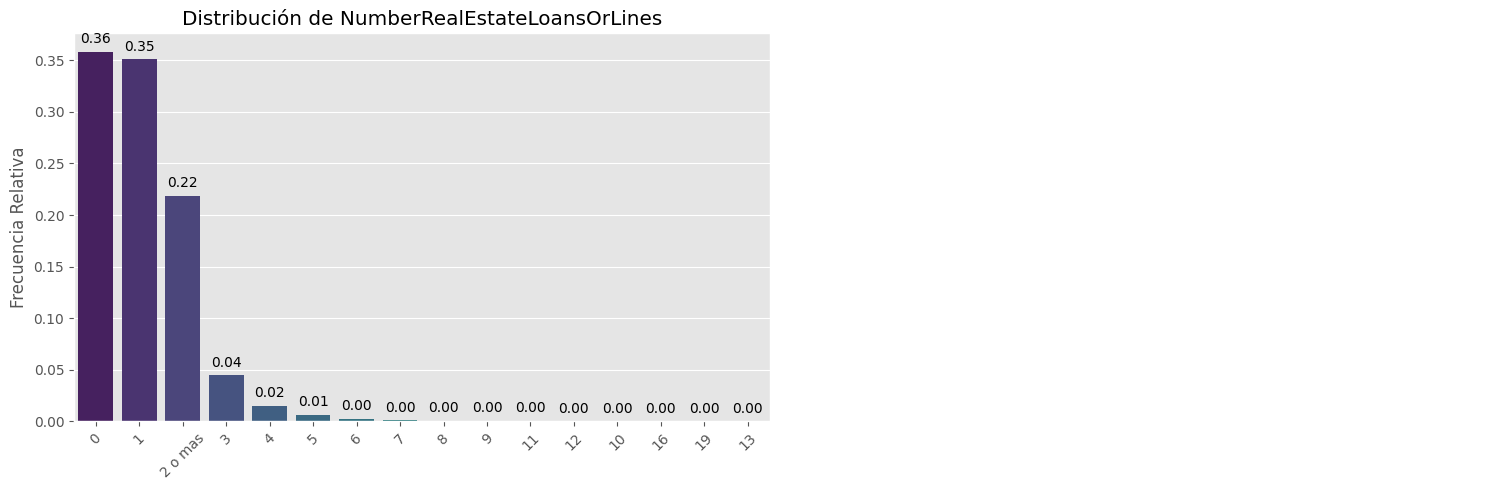

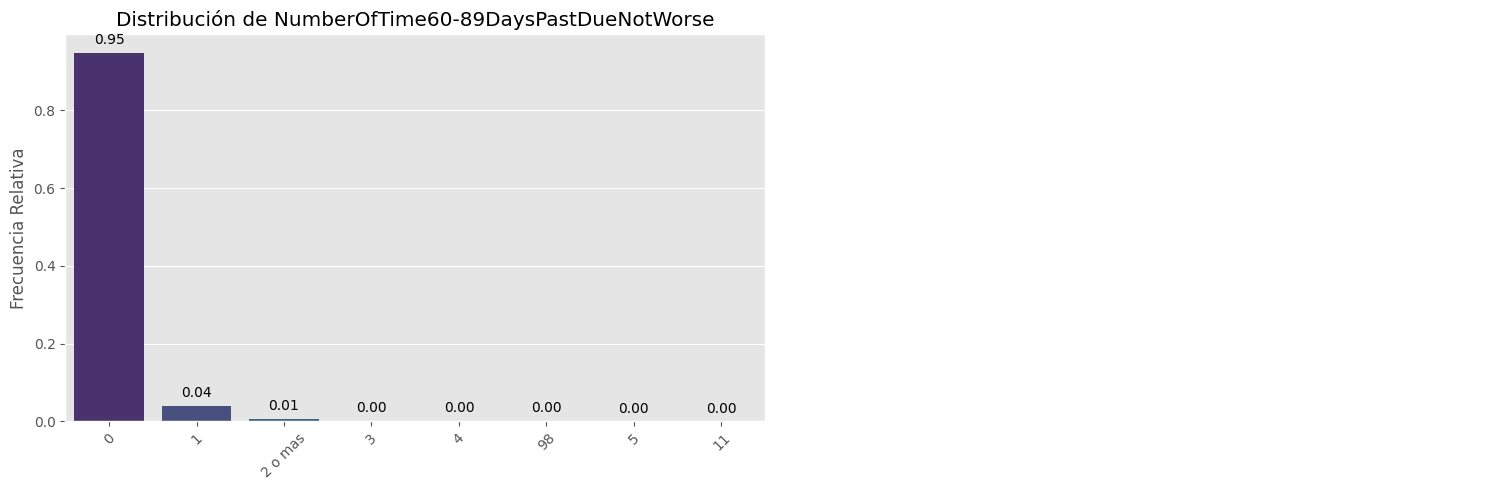

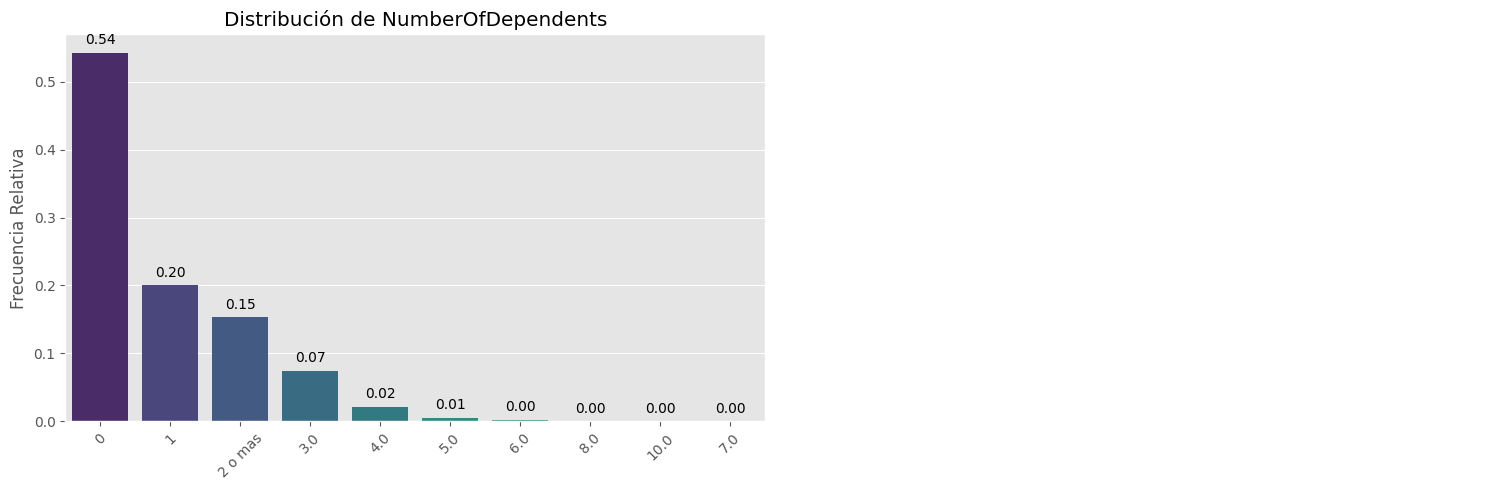

In [48]:
categoricas = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]
for i in categoricas:
    bt.pinta_distribucion_categoricas(df, [i], relativa=True, mostrar_valores=True)

In [24]:
target = 'SeriousDlqin2yrs'

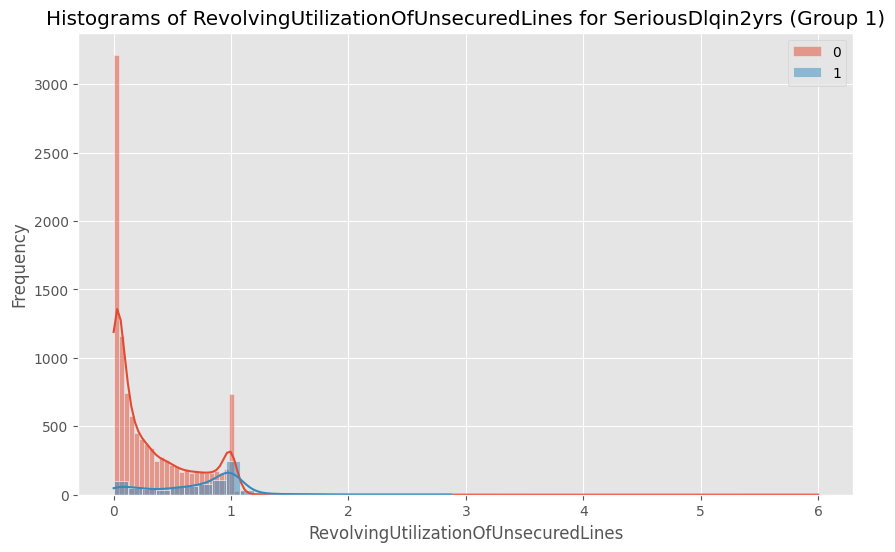

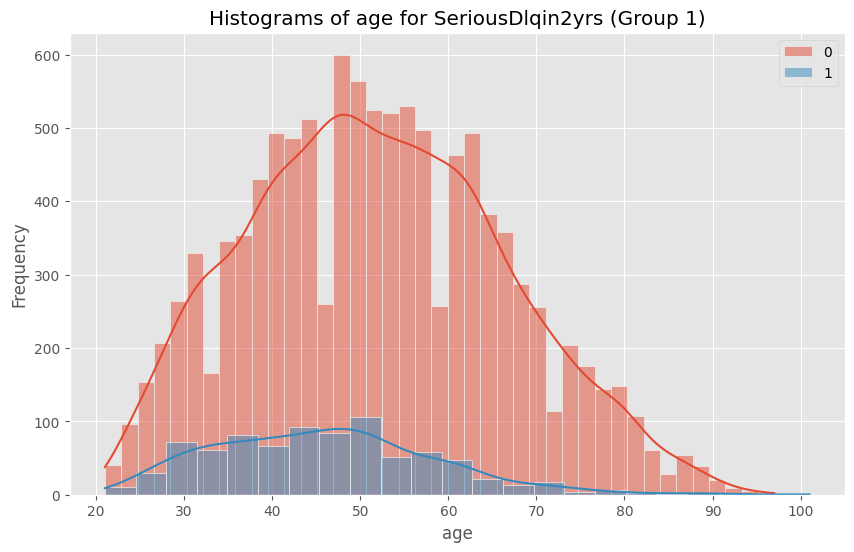

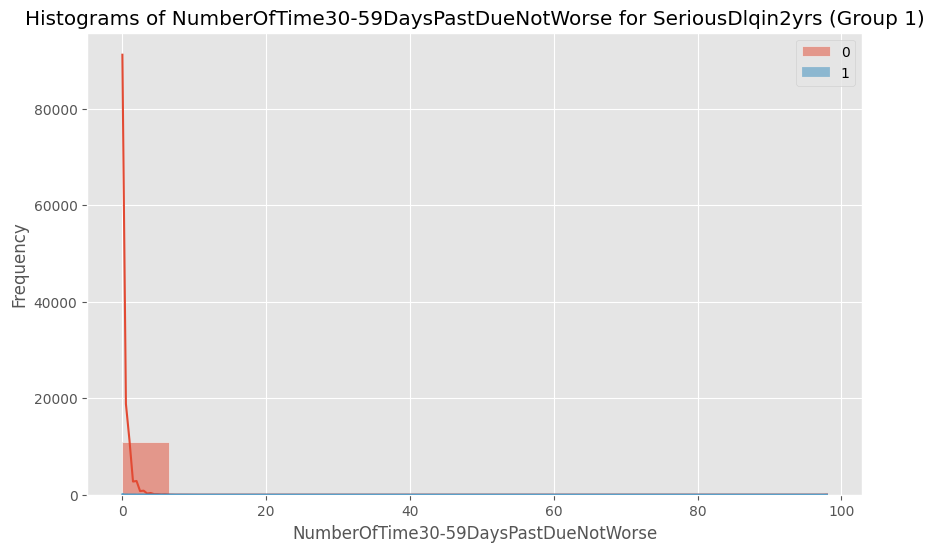

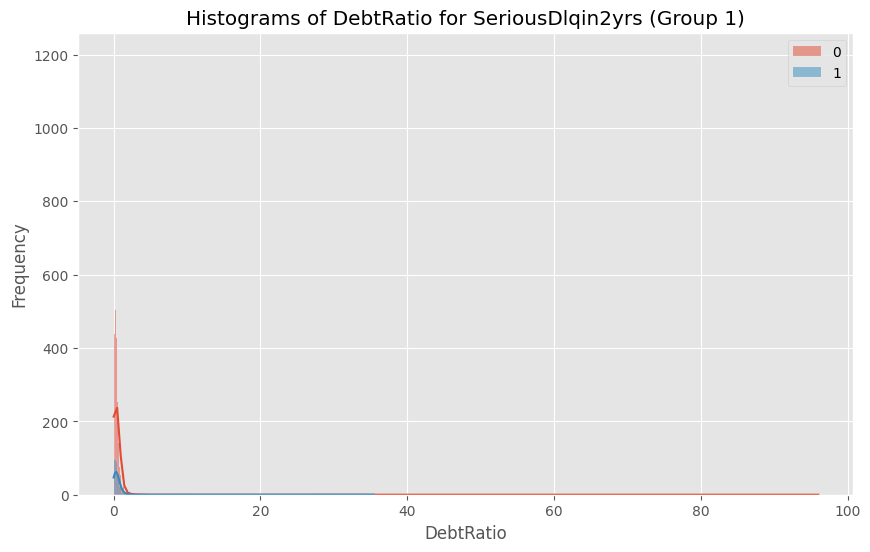

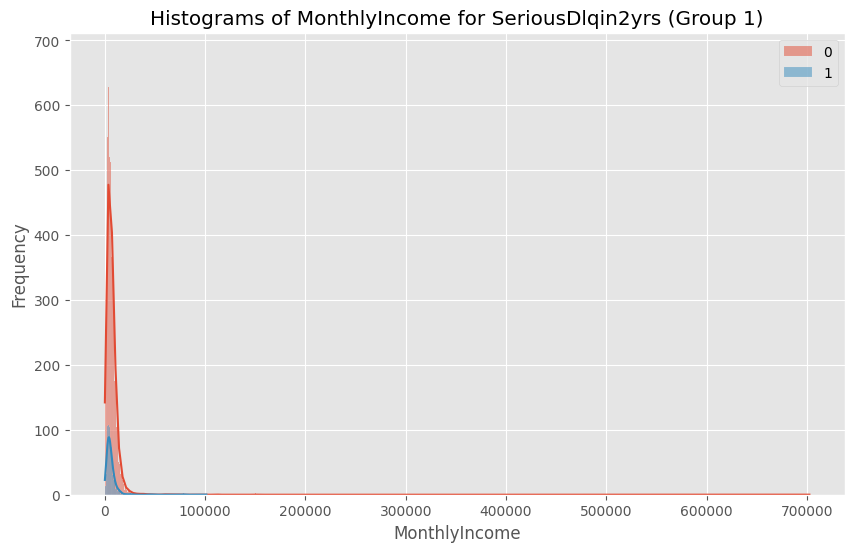

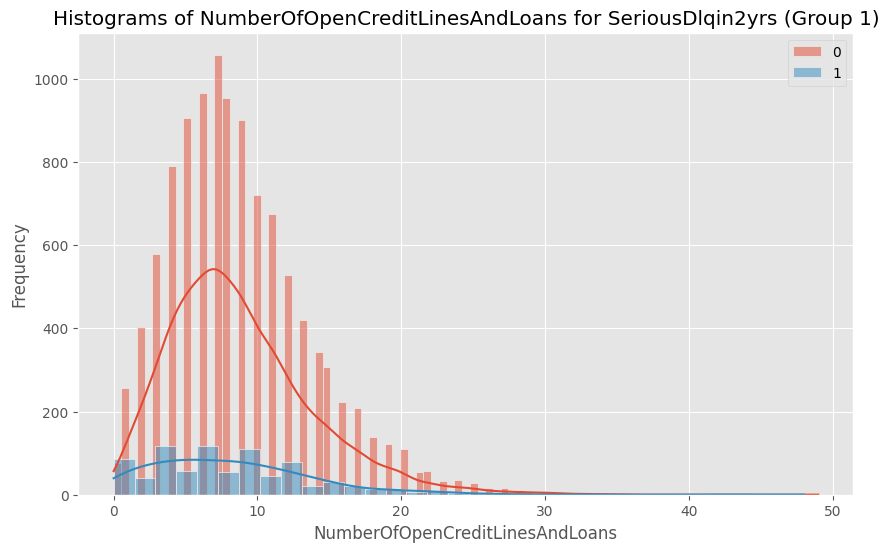

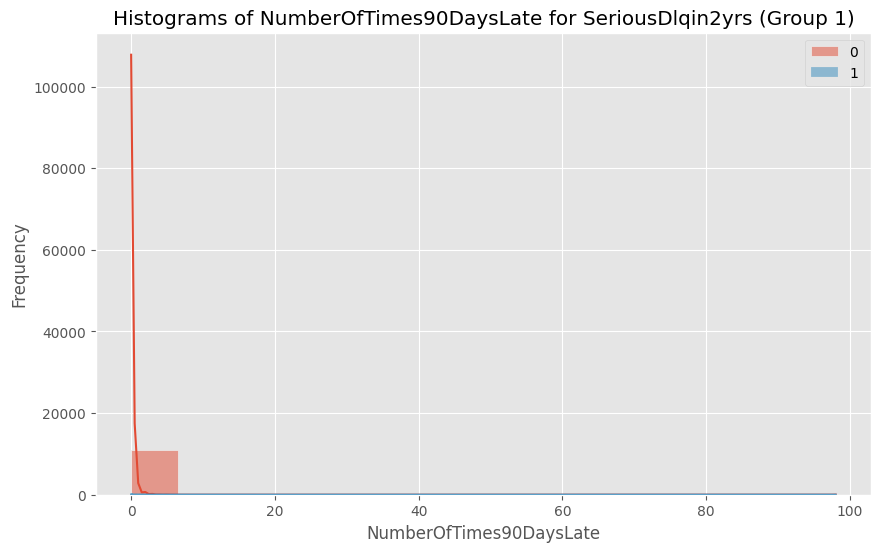

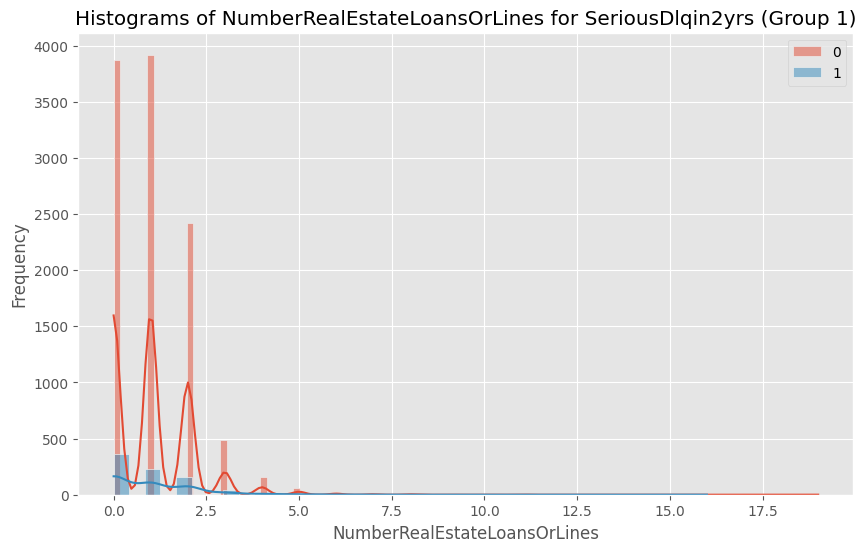

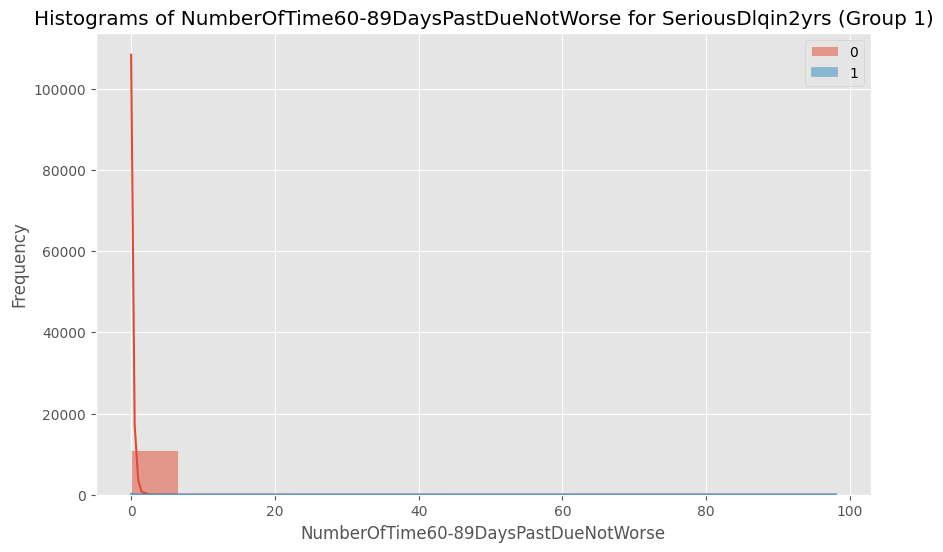

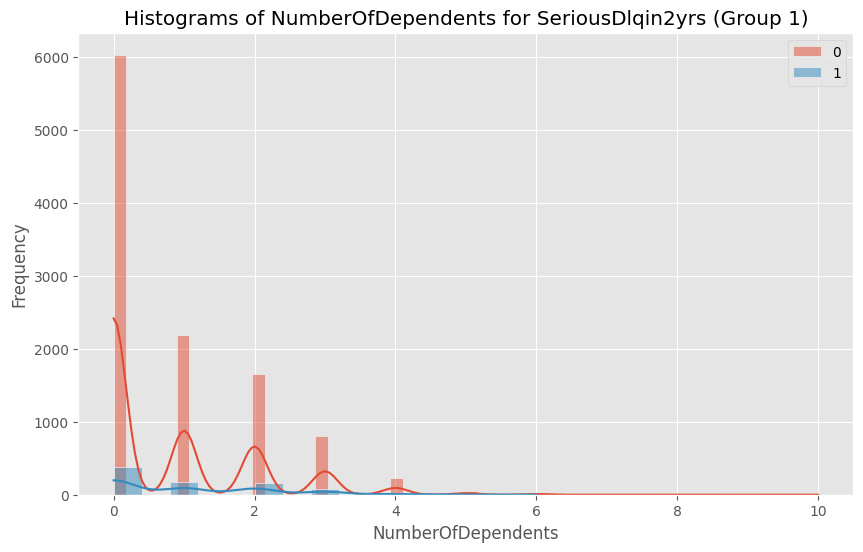

In [25]:

features_num = [col for col in df.columns if col != target]
features_num

for col in features_num:
    bt.plot_grouped_histograms(df, cat_col= target, num_col= col, group_size= 2)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [10]:
X_train = df.drop('SeriousDlqin2yrs', axis=1)
y_train= df['SeriousDlqin2yrs']

In [26]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()

# Validación cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='recall_macro')
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='recall_macro')
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='recall_macro')

# Mostrar resultados
print(f'Random Forest - Recall Medio: {rf_scores.mean()}')
print(f'SVM - Recall Medio: {svm_scores.mean()}')
print(f'KNN - Recall Medio: {knn_scores.mean()}')

Random Forest - Recall Medio: 0.5947831300242564
SVM - Recall Medio: 0.5
KNN - Recall Medio: 0.5022347601856045


In [30]:
# Inicializar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo en los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Imprimir el informe de clasificación y la matriz de confusión
print("Rendimiento con hiperparámetros predeterminados:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Rendimiento con hiperparámetros predeterminados:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.48      0.12      0.19       167

    accuracy                           0.93      2364
   macro avg       0.71      0.55      0.58      2364
weighted avg       0.90      0.93      0.91      2364

Matriz de Confusión:
[[2175   22]
 [ 147   20]]


In [31]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall_macro')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_rf_model = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros
print(f'Mejores hiperparámetros: {grid_search.best_params_}')


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [32]:
# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best = best_rf_model.predict(X_test)

# Imprimir el informe de clasificación y la matriz de confusión del mejor modelo
print("Rendimiento con los mejores hiperparámetros:")
print(classification_report(y_test, y_pred_best))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_best))

Rendimiento con los mejores hiperparámetros:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.56      0.14      0.22       167

    accuracy                           0.93      2364
   macro avg       0.75      0.56      0.59      2364
weighted avg       0.91      0.93      0.91      2364

Matriz de Confusión:
[[2179   18]
 [ 144   23]]
